## 1. Requeriments

In [1]:
# import torch
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

## 2. Import libraries

In [2]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import pandas as pd
from sklearn import preprocessing
import random
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader

## 3. Graph building

### 3.1. Gene matrix

In [3]:
genes = pd.read_csv('C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_RNA_30_nodes.csv')
Y = genes.Y

genes = genes.iloc[:,1:70] 
genes

,AGO1,AGO2,AGO3,AGO4,ATM,BLM,BRCA1,CCNH,CDK7,CETN2,...,TARBP2,TCEA1,TNRC6A,TP53,UBE3A,UBE4B,UBQLN1,XPC,XRCC5,XRCC6
0,31.170461,33.868040,34.077314,30.239317,35.942429,31.244875,31.743392,34.046458,35.541283,31.646461,...,29.60417,34.73469,34.84045,33.83518,34.42321,34.19268,34.35155,32.24472,34.81697,35.24634
1,31.630351,33.663084,33.091982,32.065670,35.988225,30.105976,31.802222,34.277235,34.829833,32.679394,...,29.61188,35.11581,34.25218,34.44810,34.01453,34.35633,34.08819,32.15619,35.21947,35.91455
2,31.505901,33.349766,35.667833,31.877381,36.193587,31.023057,32.451278,33.744069,34.285231,31.872957,...,31.90343,34.90270,35.06216,35.41980,35.11894,34.08793,34.74158,31.86536,35.69939,36.05801
3,31.572788,34.075630,33.662457,31.840038,36.578348,30.467932,31.445279,33.694154,33.279733,32.298857,...,30.35424,35.27766,34.66105,34.18862,34.79880,33.74468,33.96013,31.63561,34.94328,35.75676
4,31.683129,33.209970,34.328053,34.473079,36.807497,31.571760,31.478231,33.506292,33.510244,31.590082,...,31.60946,34.70003,36.06406,34.91241,34.66741,33.57630,33.00250,33.12717,35.50471,36.33015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,32.129661,33.188747,33.036413,30.872630,35.318612,30.595065,32.939103,33.741326,33.572540,31.654666,...,31.57179,34.47295,34.59784,35.39631,34.49603,33.81681,33.94887,32.70183,34.68853,35.53767
177,30.025486,33.979896,35.094100,30.063779,35.771711,28.897371,31.278648,35.648186,35.425593,34.200155,...,34.36199,34.82682,33.30296,32.04003,33.45254,32.10827,33.71313,30.79817,34.68277,35.50224
178,31.668795,34.331631,33.098079,31.929252,36.008091,29.804303,31.444829,33.946222,33.205129,32.210159,...,29.30238,35.46675,34.67722,33.34126,34.32375,33.15768,34.42470,32.60750,34.92302,35.22805
179,31.432256,33.528046,33.466404,31.635386,37.008936,28.914170,33.381305,33.769115,33.800790,30.664888,...,30.72343,34.71643,35.00846,34.98283,34.59549,33.31321,34.73147,33.35291,34.82723,34.81409


In [4]:
scaler = preprocessing.MinMaxScaler()
names = genes.columns
d = scaler.fit_transform(genes)
genes = pd.DataFrame(d, columns=names)
genes

,AGO1,AGO2,AGO3,AGO4,ATM,BLM,BRCA1,CCNH,CDK7,CETN2,...,TARBP2,TCEA1,TNRC6A,TP53,UBE3A,UBE4B,UBQLN1,XPC,XRCC5,XRCC6
0,0.351788,0.574734,0.644219,0.278041,0.551095,0.815288,0.411530,0.500759,0.787138,0.562977,...,0.593083,0.413085,0.485400,0.403803,0.482246,0.616039,0.600337,0.395122,0.476162,0.495999
1,0.493087,0.513879,0.423811,0.589478,0.561963,0.719207,0.422766,0.559949,0.643675,0.737387,...,0.593743,0.511560,0.374668,0.538341,0.333033,0.662167,0.515400,0.370940,0.628132,0.686270
2,0.454850,0.420850,1.000000,0.557370,0.610698,0.796575,0.546740,0.423201,0.533857,0.601221,...,0.789730,0.456496,0.527133,0.751632,0.736265,0.586514,0.726126,0.291501,0.809333,0.727119
3,0.475401,0.636370,0.551420,0.551002,0.702007,0.749743,0.354588,0.410399,0.331100,0.673134,...,0.657234,0.553379,0.451631,0.481384,0.619379,0.489763,0.474099,0.228745,0.523853,0.641339
4,0.509303,0.379343,0.700306,1.000000,0.756387,0.842865,0.360882,0.362216,0.377582,0.553458,...,0.764588,0.404129,0.715724,0.640258,0.571407,0.442302,0.165252,0.636162,0.735829,0.804610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.646497,0.373042,0.411381,0.386036,0.403055,0.760468,0.639917,0.422498,0.390144,0.564362,...,0.761366,0.345456,0.439732,0.746476,0.508834,0.510094,0.470468,0.519981,0.427668,0.578954
177,0.000000,0.607945,0.871662,0.248107,0.510581,0.617246,0.322761,0.911573,0.763809,0.994167,...,1.000000,0.436890,0.195993,0.009761,0.127844,0.028511,0.394439,0.000000,0.425493,0.568866
178,0.504899,0.712381,0.425175,0.566216,0.566677,0.693757,0.354502,0.475050,0.316056,0.658157,...,0.567273,0.602237,0.454674,0.295386,0.445932,0.324306,0.623928,0.494215,0.516203,0.490791
179,0.432223,0.473784,0.507565,0.516104,0.804191,0.618663,0.724380,0.429625,0.436170,0.397239,...,0.688809,0.408367,0.517025,0.655716,0.545148,0.368145,0.722865,0.697822,0.480036,0.372918


In [5]:
train_genes, test_genes, Y_train, Y_test = train_test_split(genes, Y, test_size=0.1, stratify=Y)

### 3.2. Graph edges

In [6]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/network_edges_mrcc_RNA_30_nodes.tsv'
data = pd.read_csv(path, delimiter='\t')
edge_index1=data[data.columns[1]].to_numpy()
edge_index2=data[data.columns[2]].to_numpy()

In [7]:
edge_index = np.concatenate((edge_index1, edge_index2))

In [8]:
edge_index

array(['BLM', 'BLM', 'BLM', 'BLM', 'BLM', 'BLM', 'BLM', 'BLM', 'BLM',
       'BLM', 'BLM', 'CUL4B', 'CUL4B', 'CUL4B', 'CUL4B', 'CUL4B', 'CUL4B',
       'CUL4B', 'CUL4B', 'CUL4B', 'CUL4B', 'CUL4B', 'CUL4B', 'CUL4B',
       'CUL4A', 'CUL4A', 'CUL4A', 'CUL4A', 'CUL4A', 'CUL4A', 'CUL4A',
       'CUL4A', 'CUL4A', 'CUL4A', 'CUL4A', 'CUL4A', 'NPM1', 'NPM1',
       'NPM1', 'NPM1', 'NPM1', 'NPM1', 'NPM1', 'NPM1', 'NPM1', 'NPM1',
       'NPM1', 'NPM1', 'NPM1', 'NPM1', 'NPM1', 'CCNH', 'CCNH', 'CCNH',
       'CCNH', 'CCNH', 'CCNH', 'CCNH', 'CCNH', 'CCNH', 'CCNH', 'CCNH',
       'TCEA1', 'TCEA1', 'TCEA1', 'SRRT', 'SRRT', 'SRRT', 'SRRT', 'MSH6',
       'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6',
       'MSH6', 'LIG4', 'LIG4', 'LIG4', 'LIG4', 'PARP1', 'PARP1', 'PARP1',
       'PARP1', 'PARP1', 'PARP1', 'PARP1', 'PARP1', 'PARP1', 'PARP1',
       'PARP1', 'PARP1', 'PARP1', 'PARP1', 'PARP1', 'PARP1', 'GTF2F1',
       'GTF2F1', 'GTF2F1', 'GTF2F1', 'GTF2F1', 'GTF2F1', 'GTF2F1',
       

In [9]:
le = preprocessing.LabelEncoder()
le.fit(edge_index)
len(list(le.classes_))

69

In [10]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [11]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [12]:
edge_index

array([[ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 60, 60,
        60, 58, 58, 58, 58, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 37,
        37, 37, 37, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
        45, 45, 45, 30, 30, 30, 30, 30, 30, 30, 30, 23, 23, 23, 23, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 31, 31, 31, 31, 31, 31, 31, 31,
        31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 25, 25, 25,
        25, 25, 25, 25, 25, 26, 26, 26,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1, 27,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 33, 33, 33, 33, 33,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        65, 65, 65, 65, 65,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6, 20, 20, 20, 20, 20, 20, 36, 

In [13]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 12, 12, 12, 12, 12, 12, 12,
         12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
         43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  7,  7, 60, 60, 60, 58, 58, 58, 58, 42, 42, 42,
         42, 42, 42, 42, 42, 42, 42, 37, 37, 37, 37, 45, 45, 45, 45, 45, 45, 45,
         45, 45, 45, 45, 45, 45, 45, 45, 45, 30, 30, 30, 30, 30, 30, 30, 30, 23,
         23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 31, 31, 31, 31, 31, 31,
         31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 25, 25, 25,
         25, 25, 25, 25, 25, 26, 26, 26,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 33, 33,
         33, 33, 33,  2,  2,  2,  2,  2,  3,  3,  3,  3, 65, 65, 65, 65, 65,  6,
          6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 20,
         20, 20, 20, 20, 20,

### 3.3. Create dataset

In [14]:
train_data=[]
for g in range(len(train_genes)):
  b=[]
  for i in train_genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    # a.append(i*100)
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float).reshape([-1,1])
  edge_index = edge_index
  y = torch.tensor([Y_train.iloc[g]], dtype=torch.long).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  train_data.append(data)

print(len(train_data))

162


In [15]:
test_data=[]
for g in range(len(test_genes)):
  b=[]
  for i in test_genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    # a.append(i*100)
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float).reshape([-1,1])
  edge_index = edge_index
  y = torch.tensor([Y_test.iloc[g]], dtype=torch.long).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  test_data.append(data)

print(len(test_data))

19


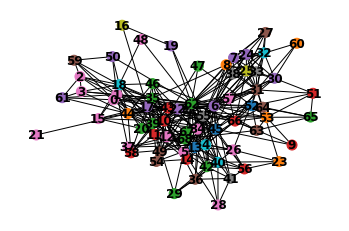

In [16]:
def plot_graph(data,description=True):
    edges_raw = data.edge_index.numpy()
    edges = [(x, y) for x, y in zip(edges_raw[0, :], edges_raw[1, :])]
    labels = data.x.numpy()
    G = nx.Graph()
    G.add_nodes_from(list(range(np.max(edges_raw))))
    G.add_edges_from(edges)
    plt.subplot(111)
    options = {
       'node_size': 100,
       'width': 1,
    }
    nx.draw(G, with_labels=description, node_color=labels.tolist(), cmap=plt.cm.tab10, font_weight='bold', **options)
    plt.show()

plot_graph(data,True)

### 3.4. Patient sample

In [17]:
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Number of node features: {data.num_node_features}')


Number of nodes: 69
Number of charcateristics per node: 1
Number of edges: 362
Average node degree: 5.25
Has isolated nodes: False
Has self-loops: False
Is undirected: False
Number of node features: 1


## 4. Graph training

### 4.2. Training and testing the model

In [18]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GraphConv
from torch_geometric.nn import SAGPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
from torch import nn

In [19]:
# import torch
# import torch.nn.functional as F
# from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
# from torch_geometric.nn import GCNConv, GINConv
# from torch_geometric.nn import global_mean_pool, global_add_pool
# embed_dim = 32

# class Net(torch.nn.Module):
#     def __init__(self, dim_h):
#         super(Net, self).__init__()
#         self.conv1 = GCNConv(1, dim_h)
#         self.conv2 = GCNConv(dim_h, dim_h)
#         self.conv3 = GCNConv(dim_h, dim_h)
#         self.lin = Linear(dim_h, 1)

#     def forward(self, x, edge_index, batch):
#         # Node embeddings 
#         h = self.conv1(x, edge_index)
#         h = h.RRRRelu()
#         h = self.conv2(h, edge_index)
#         h = h.relu()
#         h = self.conv3(h, edge_index)

#         # Graph-level readout
#         hG = global_mean_pool(h, batch)

#         # Classifier
#         h = F.dropout(hG, p=0.5, training=self.training)
#         h = self.lin(h)
        
#         return F.sigmoid(h).squeeze(1)


In [20]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, RReLU, Dropout
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool

class GIN(torch.nn.Module):
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(1, dim_h),
                       BatchNorm1d(dim_h), RReLU(),
                       Linear(dim_h, dim_h), RReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), RReLU(),
                       Linear(dim_h, dim_h), RReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), RReLU(),
                       Linear(dim_h, dim_h), RReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, 2)

    def forward(self, x, edge_index, batch):
        # Node embeddings 
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)
        
        return F.log_softmax(h, dim=1)

In [21]:
from sklearn.metrics import f1_score

def train(model, train_loader, optimizer, criterion):
    total_loss = 0
    acc = 0
    for data in train_loader:
        optimizer.zero_grad()
        output = model(data.x, data.edge_index, data.batch)
        loss = criterion(output, data.y.squeeze(1))  
        total_loss += loss / len(train_loader)
        acc += accuracy(output.argmax(dim=1), data.y.squeeze(1)) / len(train_loader)
        f1score = f1_score(data.y.squeeze(1), output.argmax(dim=1), average='weighted')
        loss.backward()
        optimizer.step()
    return total_loss, acc, f1score

    
@torch.no_grad()
def validation(model, val_loader, criterion):
    model.eval()
    acc = 0
    loss = 0
    for data in val_loader:
        output = model(data.x, data.edge_index, data.batch)
        loss += criterion(output, data.y.squeeze(1))/ len(val_loader)
        acc += accuracy(output.argmax(dim=1), data.y.squeeze(1)) / len(val_loader)
        f1score = f1_score(data.y.squeeze(1), output.argmax(dim=1), average='weighted')

    return loss, acc, f1score

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

def test(model, test_data):
    acc = 0
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
    for data in test_loader:
        output = model(data.x, data.edge_index, data.batch)
        acc += accuracy(output.argmax(dim=1), data.y.squeeze(1)) / len(test_loader)
        f1score = f1_score(data.y.squeeze(1), output.argmax(dim=1), average='weighted')
    return acc, f1score


In [22]:
from sklearn.model_selection import StratifiedKFold # import KFold
kf=StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

TRAIN:  [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
145
17
Epoch: 000, Train loss: 21.6427, Train Acc: 0.4213, Train f1-score: 0.1337, Val loss: 8.4985, Val Acc: 0.4500, Val f1-score: 0.0000,
Epoch: 001, Train loss: 12.6374, Train Acc: 0.3963, Train f1-score: 0.1337, Val loss: 6.5748, Val Acc: 0.5500, Val f1-score: 1.0000,
Epoch: 002, Train loss: 4.1311, Train Acc: 0.5349, Train f1-score: 0.5

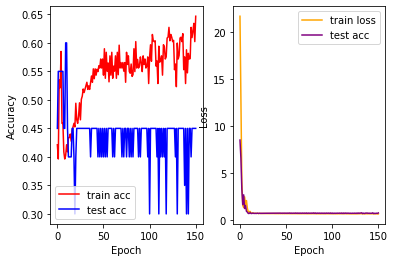

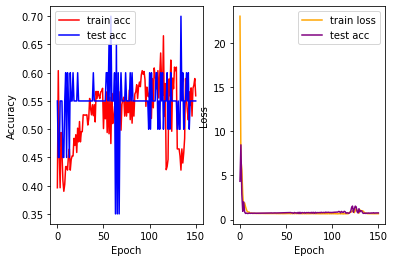

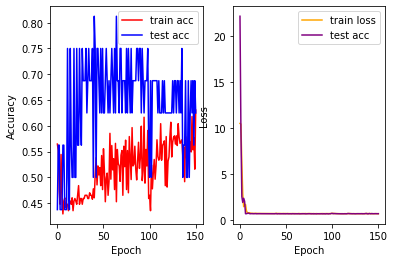

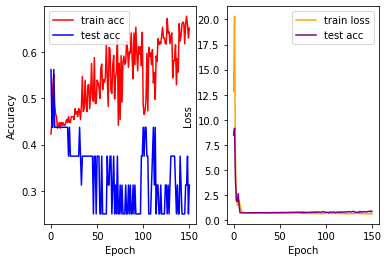

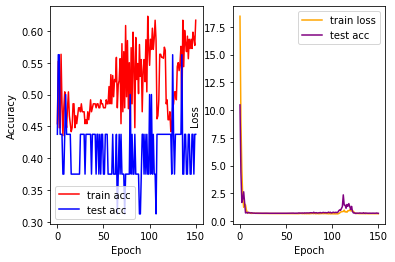

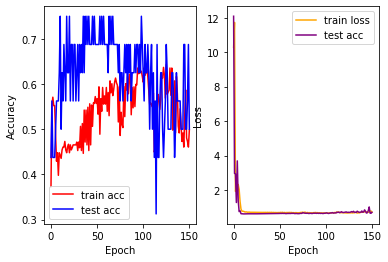

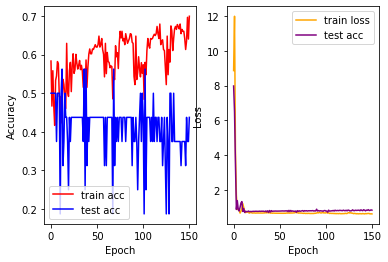

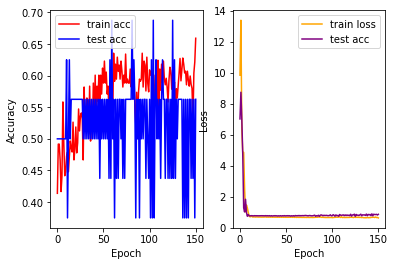

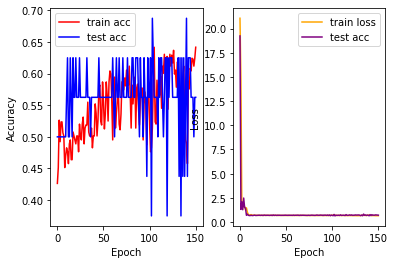

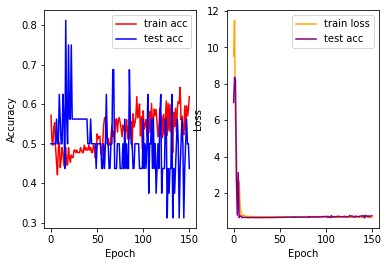

In [23]:
val_avg = []
test_avg = []
test_f1_score = []

for train_index, val_index in kf.split(train_data, Y_train):
    train_dataset=[]
    val_dataset=[]
    print("TRAIN: ", train_index, "TEST:", val_index)
    for i in train_index:
        train_dataset.append(train_data[i])
    for i in val_index:
        val_dataset.append(train_data[i])

    print(len(train_dataset))
    print(len(val_dataset))

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

    model = GIN(dim_h=576)
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.6)
    # optimizer = torch.optim.Adadelta(model.parameters(), lr=0.7)
    train_epoch=[]
    val_epoch=[]
    train_loss_=[]
    val_loss_=[]
    epochs = 150
    train_acc=0
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs+1):
        train_loss, train_acc, train_f1score = train(model, train_loader, optimizer, criterion)
        val_loss, val_acc, val_f1score = validation(model, val_loader, criterion)

        train_loss = train_loss.detach().numpy()
        train_loss_.append(train_loss)
        val_loss_.append(val_loss.detach().numpy())
        train_epoch.append(train_acc)
        val_epoch.append(val_acc)
        
        print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f}, '
            f'Train Acc: {train_acc:.4f}, Train f1-score: {train_f1score:.4f}, Val loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val f1-score: {val_f1score:.4f},')


    test_acc, test_f1score = test(model, test_data)
    print("GIN accuracy: " + str(test_acc))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(train_epoch, color="red", label="train acc")
    ax1.plot(val_epoch, color="blue", label="test acc")
    ax2.plot(train_loss_, color="orange", label="train loss")
    ax2.plot(val_loss_, color="purple", label="test acc")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax1.legend()
    ax2.legend()
    
    # plt.plot(train_epoch, color="red")
    # plt.plot(val_epoch, color="blue")
    # plt.plot(train_loss_, color="orange")
    # plt.plot(val_loss_, color="purple")
    # plt.xlabel("Epoch")
    # plt.ylabel("Accuracy")
    # plt.legend()
    val_avg.append(val_acc)
    test_avg.append(test_acc)
    test_f1_score.append(test_f1score)

print('Val accuracy: '+ str(np.array(val_avg).mean()))
print('Test accuracy: '+ str(np.array(test_avg).mean()))
print('Test f1-score: '+ str(np.array(test_f1_score).mean()))

print('Val stv: '+ str(np.array(val_avg).std()))
print('Test stv: '+ str(np.array(test_avg).std()))